In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

from Functions import Load_LC, NormalizeFlux

#globally change font size for plots
plt.rcParams['font.size'] =17
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [12]:
#File Locations for HAT_P-2b
HAT_P_2_Loc = ["data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_lc.fits",
            "data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_lc.fits"
]
Time1, Flux1 = Load_LC(HAT_P_2_Loc)


HD189733_Loc = ["data/mastDownload/TESS/tess2021204101404-s0041-0000000256364928-0212-s/tess2021204101404-s0041-0000000256364928-0212-s_lc.fits" ]
Time2, Flux2 = Load_LC(HD189733_Loc)


#Save the flux around the transit
T0 = [ 2455288.84969, #de Wit et al. 2017
        2453955.525551 #Bonomo et al. 2017
]


Period = [ 5.6334675, #de Wit et al. 2017
           2.218575200 #Bonomo et al. 2017
         ]


TDur = [4.28/24.0,   #Pal et al 2010
        1.84/24.0*1.2    #Addison et al 2019
        ]

In [13]:
#Find where the transit occurs
TransitMask1 = np.abs(Time1-T0[0]+TDur[0]/2.*1.5)%Period[0]<TDur[0]*1.5
TransitMask2_1 = np.abs(Time2-T0[1]+TDur[1]/2.)%Period[1]<TDur[1]
TransitMask2_2 = np.abs(Time2-T0[1]+TDur[1]/2.*2.5)%Period[1]<TDur[1]*2.5


#Get lomb scargle for HAT-P-2b
frequency, power = LombScargle(Time1[~TransitMask1], Time1[~TransitMask1]).autopower()




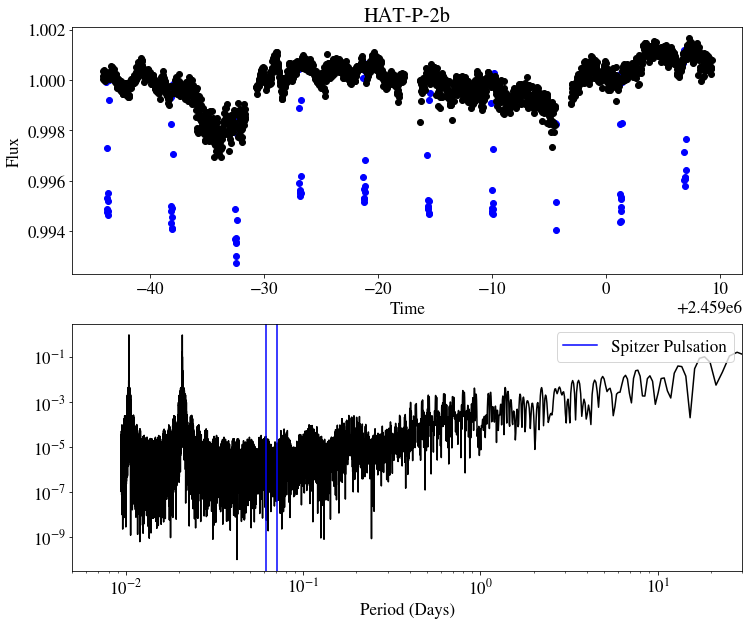

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(Time1[TransitMask1], Flux1[TransitMask1], "bo", label="Transit Points")
plt.plot(Time1[~TransitMask1], Flux1[~TransitMask1], "ko", label="Non-Transit Points")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("HAT-P-2b")
plt.subplot(212)
plt.plot(1./frequency, power, "k-")

plt.axvline(x=Period[0]/79, color="blue", label="Spitzer Pulsation")
plt.axvline(x=Period[0]/91, color="blue")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel("Period (Days)")
plt.xlim(0.005, 30)
plt.show()


#plt.figure(figsize=(12,8))
#plt.plot(Time2[~TransitMask2_1], Flux2[~TransitMask2_1], "ko")
#plt.plot(Time2[TransitMask2_1], Flux2[TransitMask2_1], "ro")
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [15]:
unique_transits

NameError: name 'unique_transits' is not defined

0.022367449656760158
0.00079519337
Wait here...


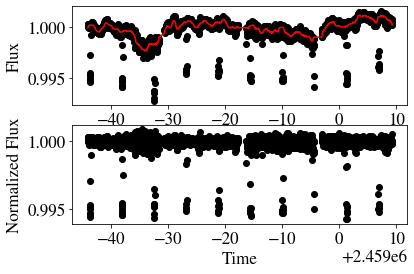

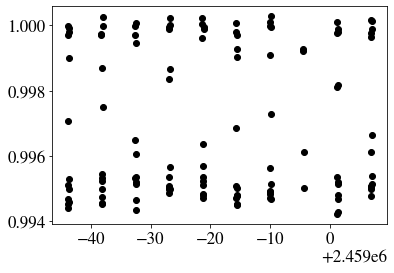

In [16]:
print(np.mean(np.diff(Time1)))

#Flux2 = Flux2[~np.isnan(Flux2)]
print(np.nanstd(Flux1[~TransitMask1]))
input("Wait here...")

SelectedTime = Time1[TransitMask1]
SelectedFlux = Flux1[TransitMask1]


NormalizedFlux1 = NormalizeFlux(Time1, Flux1, TransitMask1)
#NormalizedFlux = NormalizeFlux(Time2, Flux2, TransitMask2_1)


plt.figure()
plt.plot(Time1[TransitMask1], NormalizedFlux1[TransitMask1], "ko")
plt.show()


#np.savetxt("HD189733bLC.txt", np.transpose((Time2[TransitMask2_2], NormalizedFlux[TransitMask2_2])), header="Time, Flux", delimiter=",")

np.savetxt("HATP2bLC.txt", np.transpose((Time1[TransitMask1], NormalizedFlux1[TransitMask1])), header="Time, Flux", delimiter=",")
#Now now normalize the light curve

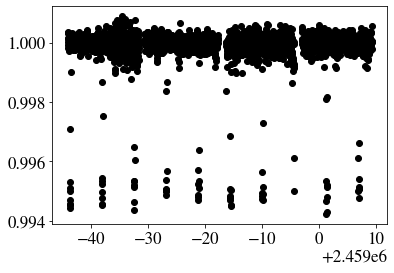

In [17]:
plt.figure()
plt.plot(Time1, NormalizedFlux1, "ko")
plt.show()

In [64]:
!ls

Download.py                   Process_TESS_data.ipynb
Figures                       ReadNPY.py
Functions.py                  Spitzer_2017.rtf
HAT-P2-b.csv                  Spitzer_2017_transit_only.rtf
HATP2bLC.txt                  Visualize_HD189733b.py
HD189733bLC.txt               __pycache__
HD189733b_Transits.pdf        data
HD189733b_Transits.png        sampler.py
PlotHD189733b.py              usetex.ipynb
Process.py


In [120]:
# Import Spitzer data
Spitzer_transits = pd.read_table('Spitzer_2017_transit_only.txt')  
Spitzer_transits["T_mid"] = Spitzer_transits["Eclipse Time [BJD-2455000]"]+P_ivshina*0.5+2455000
Spitzer_transits

,AORKEY,Start Time [UT],Eclipse Time [BJD-2455000],Eclipse Uncertainty,Eclipse Depth [p.p.m],Pulsation Amplitude [p.p.m.],Unnamed: 6,T_mid
0,43963136(T),2011 Jul 13 2:12,5756.42696,0.00047,4961 +or- 72,12 +or- 42,NaN,2.460759e+06
1,57787136(T),2015 Oct 21 13:20,7316.89688,0.00047,4923 +or- 66,-40 +or- 74,NaN,2.462320e+06
2,57786880(T),2015 Nov 18 17:39,7345.06511,0.00051,4948 +or- 71,15 +or- 71,NaN,2.462348e+06


In [121]:
print("Orbit Numbers (Based on Ivshina & Winn et al. formulation)")
(Spitzer_transits["T_mid"]-T0_ivshina)/P_ivshina

Orbit Numbers (Based on Ivshina & Winn et al. formulation)


0     888.052469
1    1165.052262
2    1170.052419
Name: T_mid, dtype: float64

In [122]:
import pandas as pd
ttv_data = pd.read_csv('HAT-P2-b.csv')  
ttv_data

,System,Orbit number,T_mid,Uncertainty (days),Time System,#,Reference
0,HAT-P-02,-249,2454353.69,0.001200,BJD_TDB,1,2013ApJ...766...95L
1,HAT-P-02,-243,2454387.49,0.000740,BJD,>1,2010MNRAS.401.2665P
2,HAT-P-02,-83,2455288.85,0.000600,BJD_TDB,1,2013ApJ...766...95L
3,HAT-P-02,0,2455756.43,0.000670,BJD_TDB,1,2013ApJ...766...95L
4,HAT-P-02,568,2458956.24,0.000429,BJD_TDB,1,This work
5,HAT-P-02,569,2458961.87,0.000377,BJD_TDB,1,This work
6,HAT-P-02,570,2458967.51,0.000420,BJD_TDB,1,This work
7,HAT-P-02,571,2458973.14,0.000346,BJD_TDB,1,This work
8,HAT-P-02,572,2458978.77,0.000305,BJD_TDB,1,This work
9,HAT-P-02,573,2458984.40,0.000494,BJD_TDB,1,This work


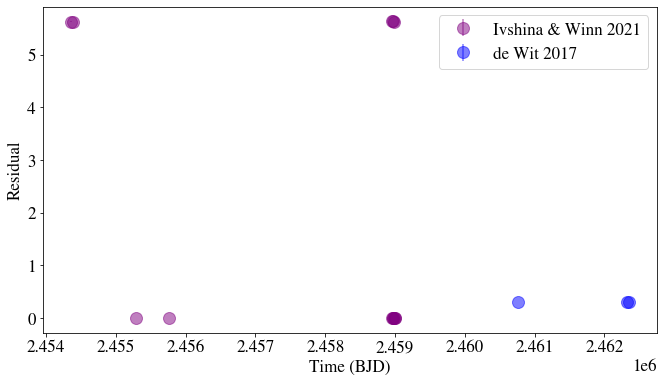

In [123]:
# plot all transit times
T0_ivshina = 2455756.4270934
P_ivshina = 5.6334696164 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
ax = axes
ax.errorbar(ttv_data["T_mid"], (ttv_data["T_mid"]-T0_ivshina)%P_ivshina, yerr= ttv_data["Uncertainty (days)"], 
            fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="Ivshina & Winn 2021")
ax.errorbar(Spitzer_transits["T_mid"], (Spitzer_transits["T_mid"]-T0_ivshina)%P_ivshina, yerr= Spitzer_transits["Eclipse Uncertainty"], 
            fmt = 'o',markersize=12, alpha = 0.5, color="blue", label="de Wit 2017")
ax.set_ylabel("Residual")
ax.set_xlabel("Time (BJD)")
ax.legend()

In [112]:
ttv_data['Expected T_mid']=ttv_data["Orbit number"]*P_ivshina+T0_ivshina#ttv_data['T_mid'][3]

In [113]:
ttv_data['TTV (days)']=(ttv_data['Expected T_mid']-ttv_data["T_mid"])#*24*60
ttv_data['TTV (minutes)']=(ttv_data['Expected T_mid']-ttv_data["T_mid"])*24*60

In [114]:
ttv_data["Uncertainty (minutes)"] = ttv_data["Uncertainty (days)"]*24*60
ttv_data

,System,Orbit number,T_mid,Uncertainty (days),Time System,#,Reference,Expected T_mid,TTV (days),TTV (minutes),Uncertainty (minutes)
0,HAT-P-02,-249,2454353.69,0.001200,BJD_TDB,1,2013ApJ...766...95L,2.454354e+06,0.003159,4.548840,1.728000
1,HAT-P-02,-243,2454387.49,0.000740,BJD,>1,2010MNRAS.401.2665P,2.454387e+06,0.003977,5.726325,1.065600
2,HAT-P-02,-83,2455288.85,0.000600,BJD_TDB,1,2013ApJ...766...95L,2.455289e+06,-0.000885,-1.274056,0.864000
3,HAT-P-02,0,2455756.43,0.000670,BJD_TDB,1,2013ApJ...766...95L,2.455756e+06,-0.002907,-4.185504,0.964800
4,HAT-P-02,568,2458956.24,0.000429,BJD_TDB,1,This work,2.458956e+06,-0.002164,-3.116858,0.617616
5,HAT-P-02,569,2458961.87,0.000377,BJD_TDB,1,This work,2.458962e+06,0.001305,1.879390,0.543456
6,HAT-P-02,570,2458967.51,0.000420,BJD_TDB,1,This work,2.458968e+06,-0.005225,-7.524362,0.604512
7,HAT-P-02,571,2458973.14,0.000346,BJD_TDB,1,This work,2.458973e+06,-0.001756,-2.528115,0.498240
8,HAT-P-02,572,2458978.77,0.000305,BJD_TDB,1,This work,2.458979e+06,0.001714,2.468133,0.439200
9,HAT-P-02,573,2458984.40,0.000494,BJD_TDB,1,This work,2.458984e+06,0.005184,7.464380,0.711504


(-395.01, -369.99)

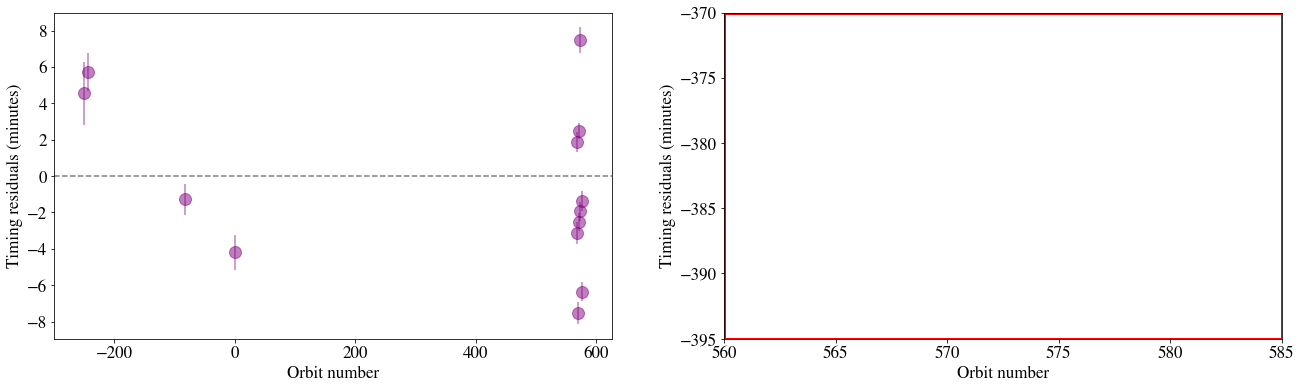

In [115]:
import matplotlib.patches as patches
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

ax = axes[0]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"],
            fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, markersize=5)
ax.set_xlabel("Orbit number")
ax.set_ylabel("Timing residuals (minutes)")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)

xmin = 560
xmax =  585
ymin = -395
ymax = -370

# Create a Rectangle patch
#rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
# Add the patch to the Axes
#ax.add_patch(rect)

ax = axes[1]
ax.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"], yerr= ttv_data["Uncertainty (minutes)"], fmt = 'o', color="purple")
ax.set_xlabel("Orbit number")
ax.set_ylabel("Timing residuals (minutes)")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.set_xlim(xmin-0.01, xmax+0.01)
ax.set_ylim(ymin-0.01, ymax+0.01)


In [116]:
np.abs(ttv_data["TTV (minutes)"])

0     4.548840
1     5.726325
2     1.274056
3     4.185504
4     3.116858
5     1.879390
6     7.524362
7     2.528115
8     2.468133
9     7.464380
10    1.939373
11    6.346877
12    1.350629
Name: TTV (minutes), dtype: float64

In [117]:
391.680000/60

6.5280000000000005

(-299.0, 627.0)

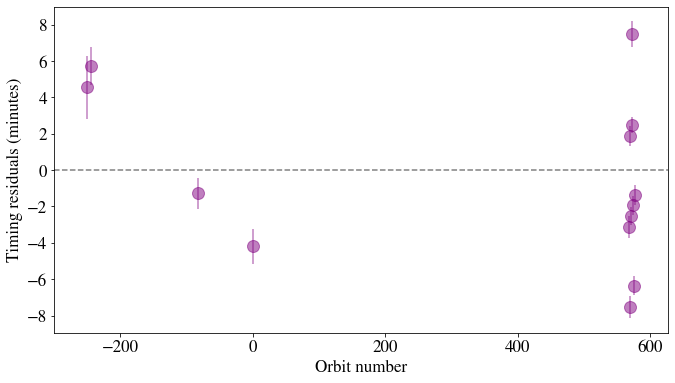

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
plt.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(xmin, xmax)


(567.0, 578.0)

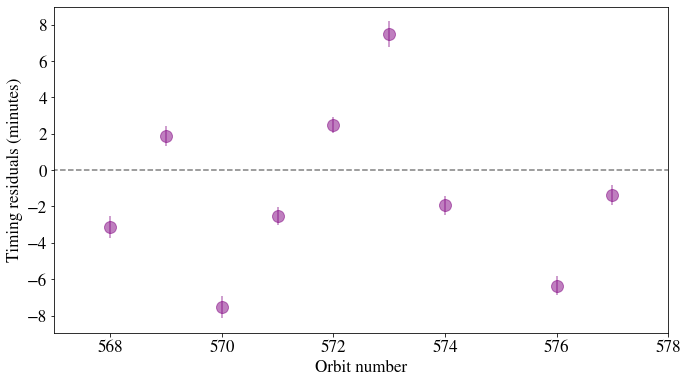

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
plt.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(567, 578)


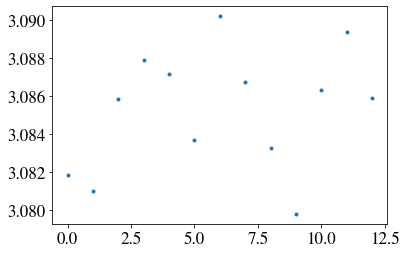

In [127]:
plt.plot(ttv_data["T_mid"]%P_ivshina, ".")

# Perform an EDMCMC fit on Transit times

In [148]:
import edmcmc as edm
import corner
import time

In [149]:
orbit_num_np = np.array(ttv_data["Orbit number"])
T_mid_np = np.array(ttv_data["T_mid"])
T_mid_err_np = np.array(ttv_data["Uncertainty (days)"])

In [150]:
def loglikelihood(theta, orbit_num, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2
    chisq = np.sum((y - model)**2 / sigma2) 
    
    #loglikelihood =  -0.5 *np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))#* chisq / sigma2 + np.log(sigma2))
    
    newsig = np.sqrt(sigma2)
    
    negloglikelihood = np.sum(0.5 * (y - model)**2 / (newsig)**2 + np.log(newsig))
    #print(loglikelihood)
    return -1*negloglikelihood

In [151]:
def chisq(theta, t, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2 
    chisq = np.sum((y - model)**2 / sigma2) 
    return chisq

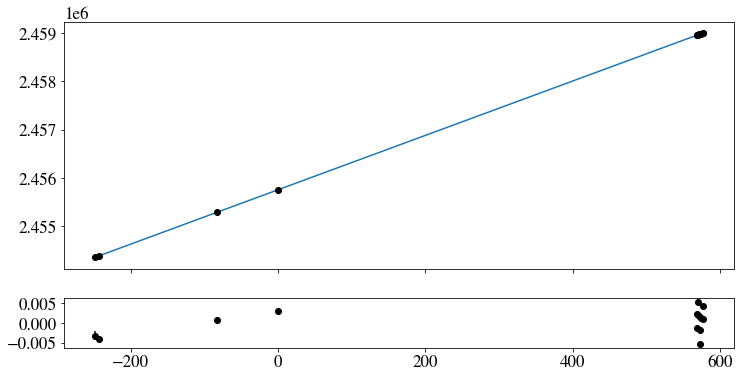

In [152]:
T0_Ivshina = 2455756.4270934
P_Ivshina = 5.6334696164  
orbits_ti = np.arange(np.min(ttv_data["Orbit number"]), np.max(ttv_data["Orbit number"]), 1)

def expected_transit_times(theta, orbit_num):
    T0, Period = theta
    return orbit_num*Period+T0

data = {"Orbit number": orbits_ti,
       'T_mid': expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), orbits_ti)}
df_ti = pd.DataFrame(data=data)

timing_preds = expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), ttv_data["Orbit number"])

fig, axes = plt.subplots(2,1, figsize=(12, 6),  sharex=True,  gridspec_kw={'height_ratios': [3, 0.6]})

ax = axes[0]
ax.errorbar(ttv_data["Orbit number"], ttv_data["T_mid"],yerr=ttv_data["Uncertainty (days)"], fmt = 'o', color='k')
ax.plot(df_ti['Orbit number'], df_ti['T_mid'])

ax = axes[1]
ax.errorbar(ttv_data["Orbit number"], ttv_data["T_mid"]-timing_preds,yerr=ttv_data["Uncertainty (days)"], fmt = 'o', color='k')


solnx = np.array([T0_Ivshina, P_Ivshina])


In [153]:
def log_prior(theta):
    T0, Period = theta
    if 5.0<Period<6.0:
        return 0.0
    return -np.inf

In [154]:
def log_probability(theta, orbit_num, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(theta, orbit_num, y, yerr)

In [159]:
width = np.array([15,5e-5])#[2e2, 2, 0.1, 0.05, 3, 0.25, 0.21]

out = edm.edmcmc(log_probability, solnx, width,
             args=(orbit_num_np,T_mid_np,T_mid_err_np), nwalkers=200, nlink = 40000, nburnin=5000)
print(np.median(out.flatchains[:,0]), '+/-', np.std(out.flatchains[:,0]), ';    ', np.median(out.flatchains[:,1]), '+/-', np.std(out.flatchains[:,1]))


/Users/zdebeurs/opt/anaconda3/lib/python3.8/site-packages/edmcmc.py:259: RuntimeWarning: overflow encountered in exp
  qs = np.exp(lastneglogl - theseneglogls)


0 days, 00:00:00.0 remains. Link 40000 of 40000. Acceptance Rate= 0.35
2455756.426872979 +/- 0.00038945930093021297 ;     5.6334716254811905 +/- 6.008515212190918e-07


In [160]:
np.shape(out.flatchains)

(7000000, 2)

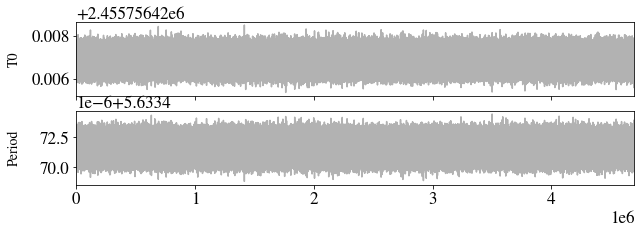

In [165]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = out.flatchains[2300000:,]
labels = ["T0", "Period"]
for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

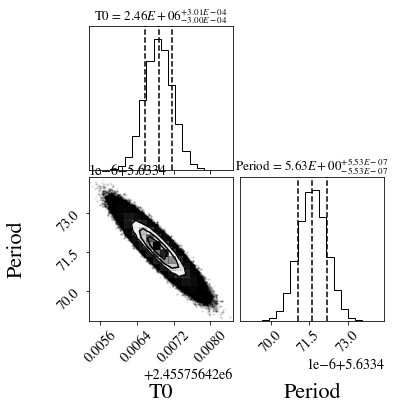

In [166]:
# global variable - set font-size to 14
plt.rcParams['font.size'] =14

# plot corner plot
fig = corner.corner(
    out.flatchains[2300000:,],
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    title_fmt=".2E",
    title_kwargs=dict(fontsize=13),
    label_kwargs=dict(fontsize=22),
    labelpad = 0.13)

#fig.suptitle(eval_method, fontsize=25)

# revert global font-size to 17
plt.rcParams['font.size'] =17

In [207]:
flat_samples = out.get_chains(nthin =5, nburnin = 1500, flat=True)

from IPython.display import display, Math

for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.8e}_{{-{1:.5e}}}^{{{2:.5e}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [192]:
T0_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
T0_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 0], [16, 50, 84])))
Period_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
Period_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 1], [16, 50, 84])))

T_mid_expected_mcmc = expected_transit_times(np.array([T0_mcmc, Period_mcmc]), orbit_num_np)

In [182]:
# create pandas dataframe based on these fits

edmcmc_ttv_data = ttv_data
edmcmc_ttv_data['T_mid_expected_mcmc'] = T_mid_expected_mcmc
edmcmc_ttv_data['TTV (days)'] = edmcmc_ttv_data['T_mid']- edmcmc_ttv_data['T_mid_expected_mcmc']
edmcmc_ttv_data["TTV (minutes)"] = edmcmc_ttv_data['TTV (days)']*24*60 
edmcmc_ttv_data["Uncertainty (minutes)"] = edmcmc_ttv_data["Uncertainty (days)"]*24*60 

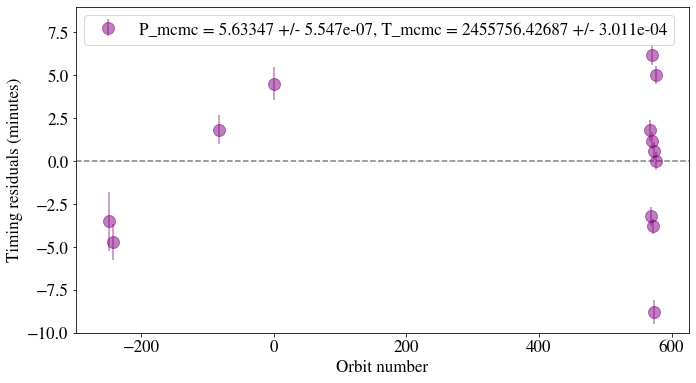

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(edmcmc_ttv_data["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_data["Orbit number"])+50
plt.errorbar(edmcmc_ttv_data["Orbit number"], edmcmc_ttv_data["TTV (minutes)"],yerr= edmcmc_ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(-10, 9)
plt.legend(loc="upper left")

(567.0, 578.0)

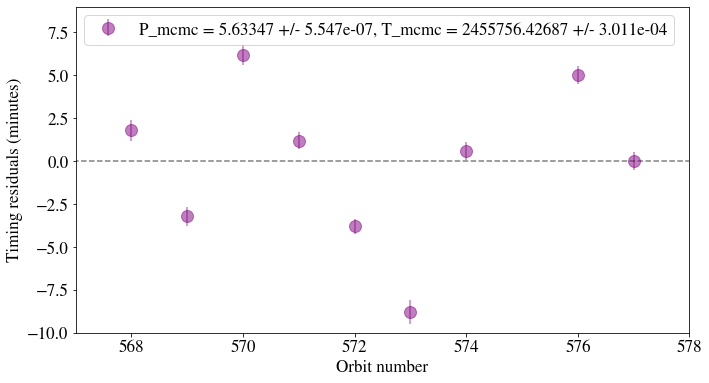

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(edmcmc_ttv_data["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_data["Orbit number"])+50
plt.errorbar(edmcmc_ttv_data["Orbit number"], edmcmc_ttv_data["TTV (minutes)"],yerr= edmcmc_ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(-10, 9)
plt.legend(loc="upper left")

plt.xlim(567, 578)